In [22]:
%reload_ext autoreload
%autoreload 2

import numpy as np
import matplotlib.pyplot as plt
from redist import modifier
from redist import plot
plot.set_style()

import matplotlib.lines as mlines
import knunu_utils

from bayesian_pyhf import plotting
import arviz as az
import corner

In [23]:
null = knunu_utils.null_pred()
alt = knunu_utils.alt_pred()

In [24]:
model, alt_yields = modifier.load('knunu_model_large.json', alt.distribution, null.distribution, return_data=True)

## Load and plot samples

In [25]:
post_data = az.from_json( '../samples/knunu_large_post_data.json')
post_pred = az.from_json( '../samples/knunu_large_post_pred.json')
prior_pred = az.from_json('../samples/knunu_large_prior_pred.json')

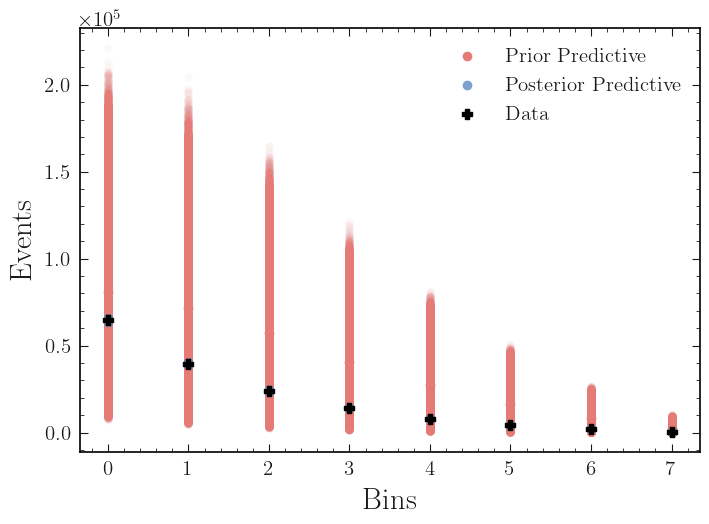

In [26]:
plotting.prior_posterior_predictives(model=model, data=alt_yields, post_pred=post_pred, prior_pred=prior_pred)
plt.show()

array([<Axes: title={'center': '94.0% HDI'}>,
       <Axes: title={'center': 'ess'}>, <Axes: title={'center': 'r_hat'}>],
      dtype=object)

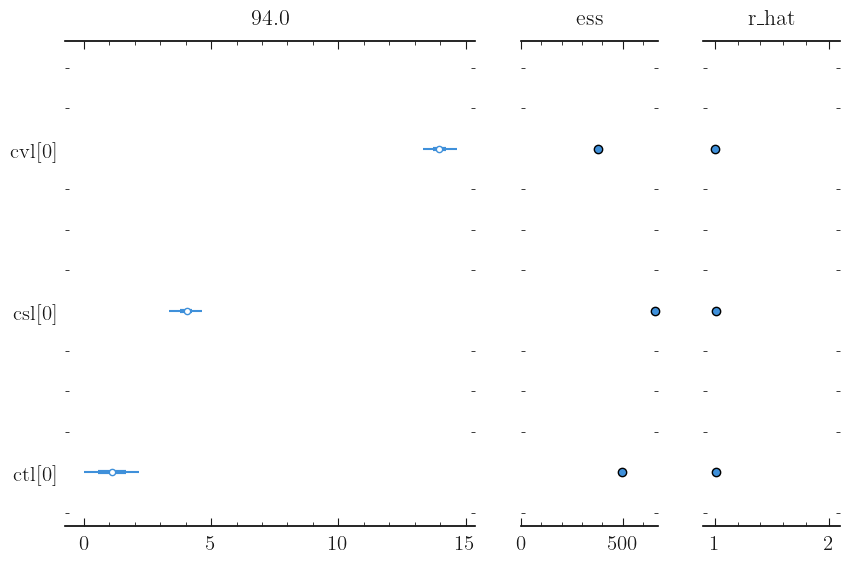

In [27]:
az.plot_forest(post_data, var_names=['cvl', 'csl', 'ctl'], combined=True, ess=True, r_hat=True)

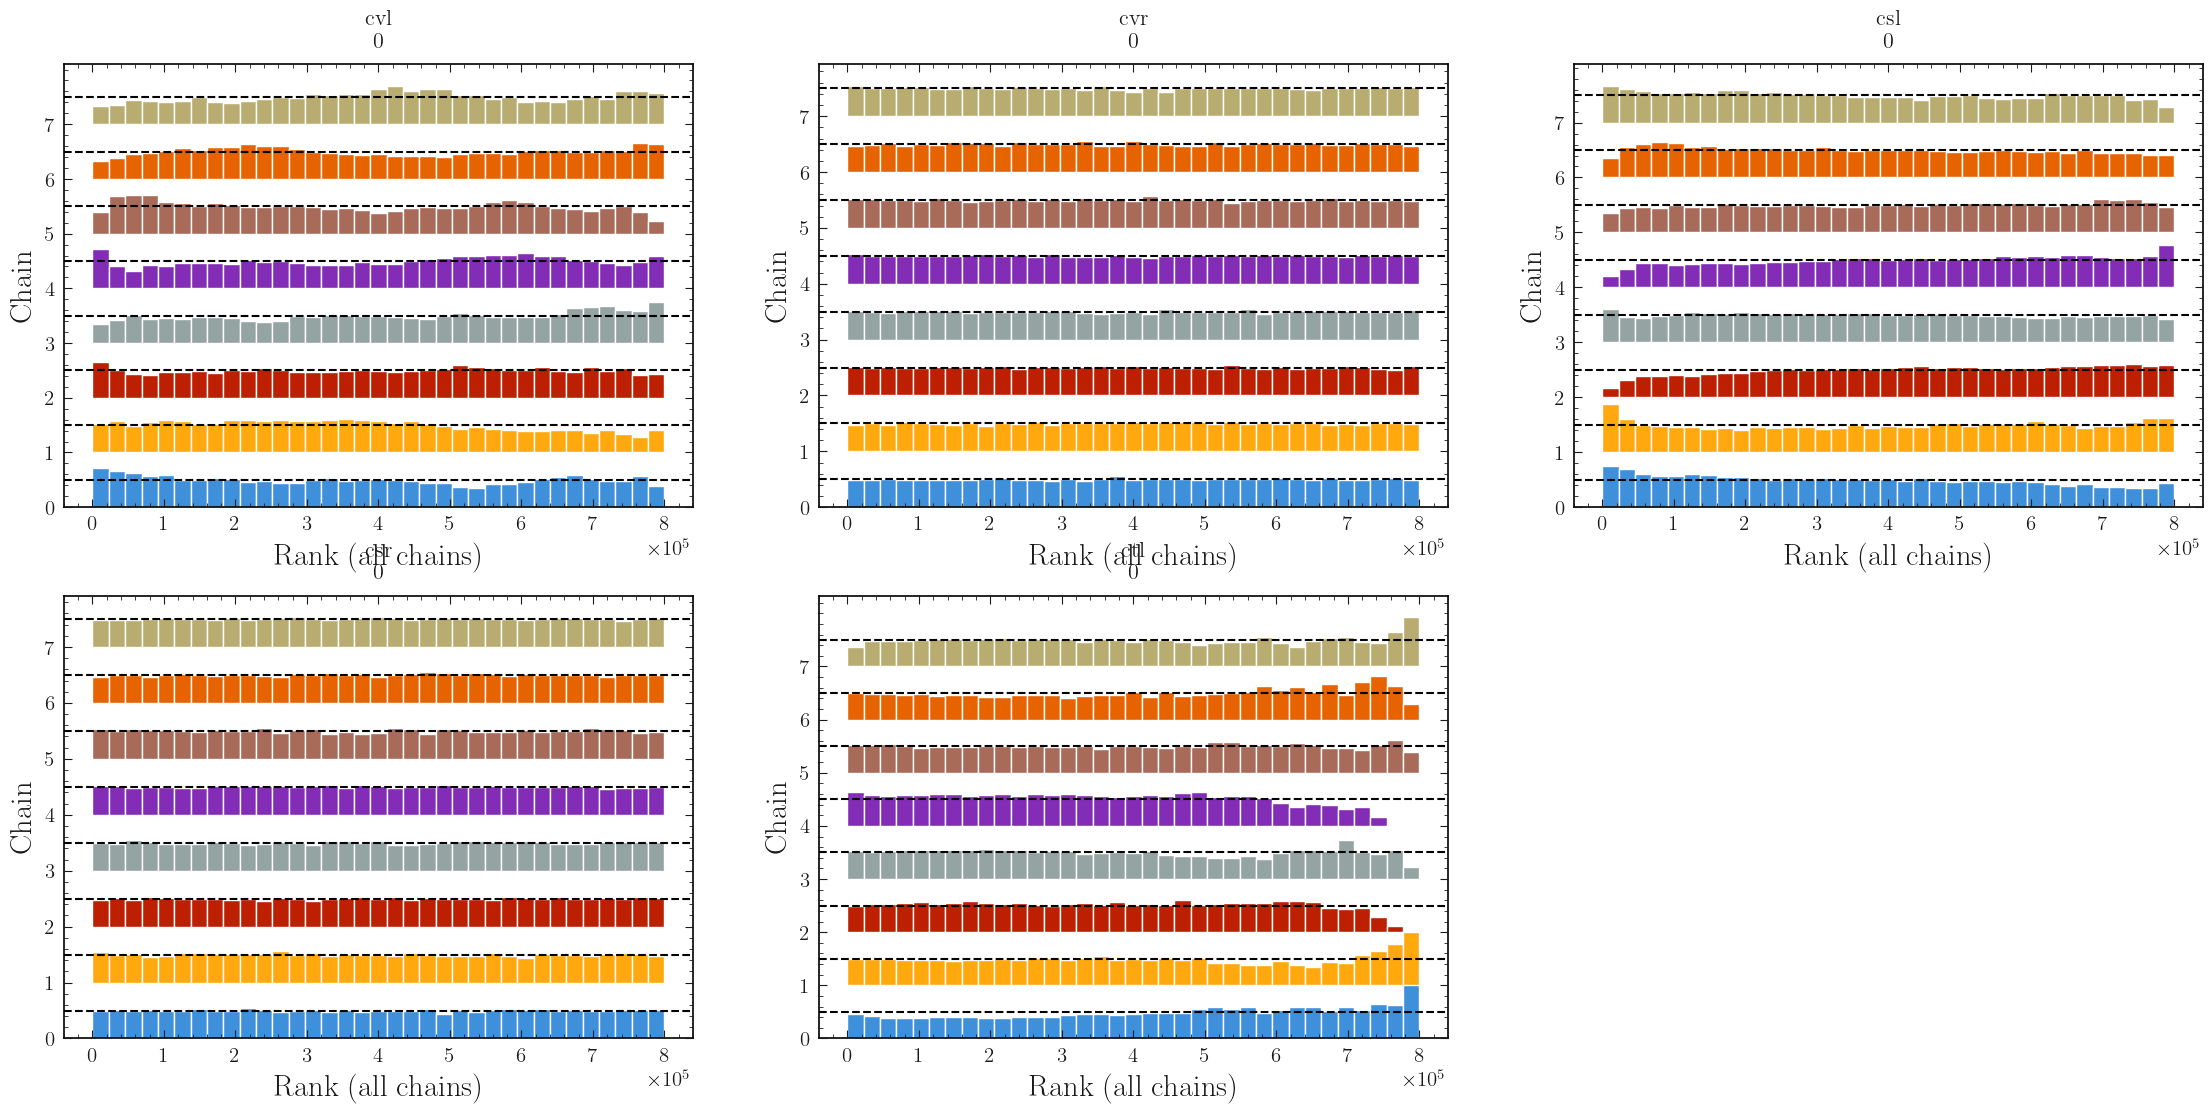

In [28]:
az.plot_rank(post_data, var_names=['cvl', 'cvr', 'csl', 'csr', 'ctl']);


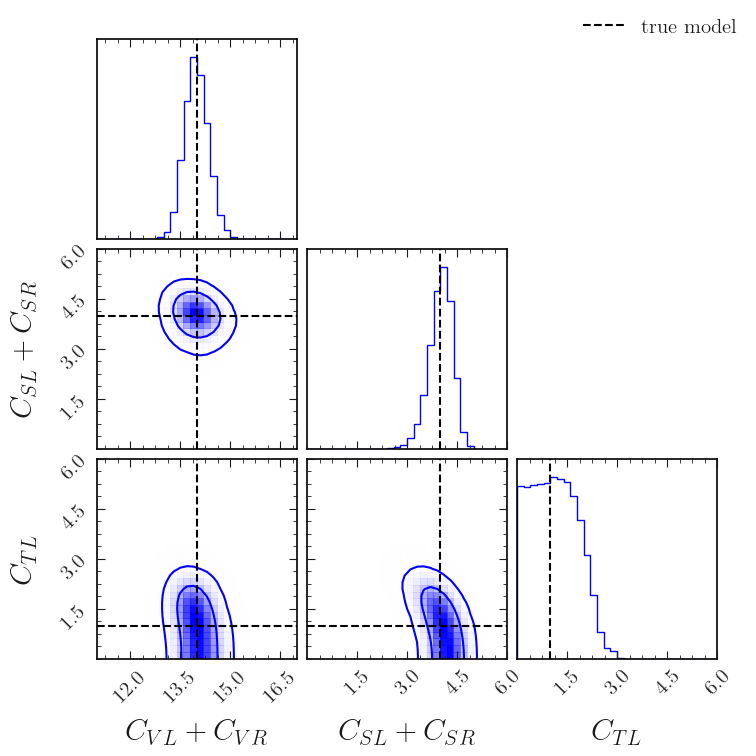

In [29]:
cv = r'$C_{VL} + C_{VR}$'
cs = r'$C_{SL} + C_{SR}$'
ct = r'$C_{TL}$'
labels = [cv, cs, ct]

file = 'results/knunu_samples.pdf'


fig = corner.corner(post_data.posterior, 
                    var_names=['cvl', 'csl', 'ctl'],
                    bins=30, 
                    levels=(0.68, 0.95), 
                    # quantiles=(0.025, 0.975), 
                    range = [(11, 17), (0,6), (0,6)],
                    smooth=1.5,
                    labels=labels,
                    color='blue',
                    plot_datapoints=False
                    );

truewcs = [14, 4, 1]
corner.overplot_lines(fig, truewcs, color='k', label='true model', linestyle='--')

handles, labs = fig.axes[0].get_legend_handles_labels()
by_label = dict(zip(labs, handles))
fig.legend(by_label.values(), by_label.keys())

# plt.savefig(file)
plt.show()

## Compare large / small


In [36]:
post_data_small = az.from_json( '../samples/knunu_small_post_data.json')
post_data_large = az.from_json( '../samples/knunu_large_post_data.json')

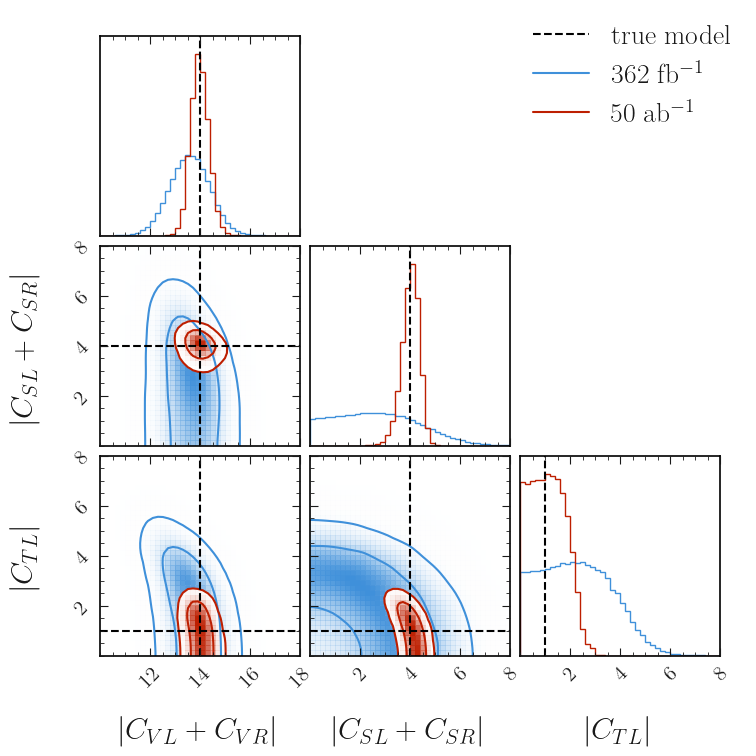

In [37]:
cv = r'$|C_{VL} + C_{VR}|$'
cs = r'$|C_{SL} + C_{SR}|$'
ct = r'$|C_{TL}|$'
labels = [cv, cs, ct]

file = '../results/knunu_samples.pdf'

fig = corner.corner(post_data_small.posterior, 
                    var_names=['cvl', 'csl', 'ctl'],
                    bins=40, 
                    levels=(0.68, 0.95), 
                    range = [(10., 18), (0,8), (0,8)],
                    smooth=1.5,
                    labels=labels,
                    color='C0',
                    plot_datapoints=False,
                    hist_kwargs={'density': True},
                    );

fig = corner.corner(post_data_large.posterior, 
                    var_names=['cvl', 'csl', 'ctl'],
                    bins=40, 
                    levels=(0.68, 0.95), 
                    range = [(10., 18), (0,8), (0,8)],
                    smooth=1.0,
                    labels=labels,
                    color='C2',
                    plot_datapoints=False,
                    hist_kwargs={'density': True},
                    fig=fig
                    );

truewcs = [14, 4, 1]
corner.overplot_lines(fig, truewcs, color='k', label='true model', linestyle='--')
# corner.overplot_points(fig, truewcs[None], marker="s", color="C2")

fig.legend(
        handles = fig.axes[0].get_legend_handles_labels()[0] + [
            mlines.Line2D([], [], color='C0', label=r'362 fb$^{-1}$'),
            mlines.Line2D([], [], color='C2', label=r'50 ab$^{-1}$'),
        ],
        fontsize=20, loc="upper right"
    )

plt.savefig(file)
plt.show()


In [38]:
results = az.summary(post_data_large, var_names=['cvl', 'csl', 'ctl'], hdi_prob=0.95).T
results

,cvl[0],csl[0],ctl[0]
mean,13.981,4.004,1.123
sd,0.355,0.352,0.672
hdi_2.5%,13.295,3.292,0.000
hdi_97.5%,14.682,4.650,2.232
mcse_mean,0.018,0.014,0.030
mcse_sd,0.013,0.010,0.025
ess_bulk,386.000,711.000,504.000
ess_tail,869.000,919.000,498.000
r_hat,1.010,1.010,1.020


In [39]:
results = az.summary(post_data_small, var_names=['cvl', 'csl', 'ctl'], hdi_prob=0.95).T
results

,cvl[0],csl[0],ctl[0]
mean,13.581,2.684,2.263
sd,0.795,1.614,1.360
hdi_2.5%,12.037,0.000,0.000
hdi_97.5%,15.148,5.483,4.571
mcse_mean,0.009,0.016,0.017
mcse_sd,0.007,0.012,0.013
ess_bulk,7369.000,10951.000,6901.000
ess_tail,14185.000,10936.000,6223.000
r_hat,1.000,1.000,1.000


## Compare to simple reweighting


In [33]:
post_data_large = az.from_json(   '../samples/knunu_large_post_data.json')
post_data_large_1b = az.from_json('../samples/knunu_large_1b_post_data.json')

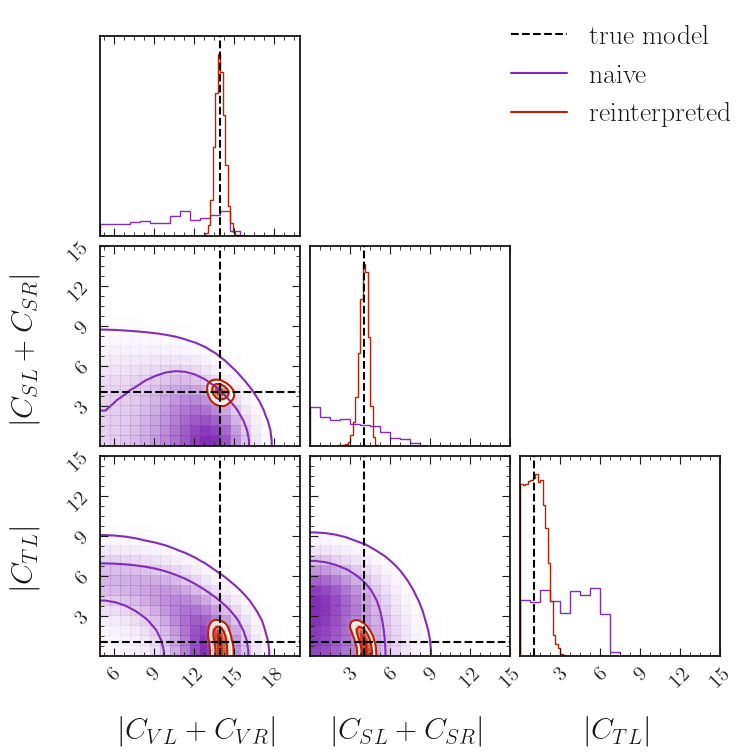

In [35]:
cv = r'$|C_{VL} + C_{VR}|$'
cs = r'$|C_{SL} + C_{SR}|$'
ct = r'$|C_{TL}|$'
labels = [cv, cs, ct]

file = '../results/knunu_samples_compare.pdf'

fig = corner.corner(post_data_large_1b.posterior, 
                    var_names=['cvl', 'csl', 'ctl'],
                    bins=20, 
                    levels=(0.68, 0.95), 
                    range = [(5., 20.), (0,15), (0,15)],
                    smooth=2.5,
                    labels=labels,
                    color='C4',
                    plot_datapoints=False,
                    hist_kwargs={'density': True},
                    );

fig = corner.corner(post_data_large.posterior, 
                    var_names=['cvl', 'csl', 'ctl'],
                    bins=80, 
                    levels=(0.68, 0.95), 
                    range = [(5., 20.), (0,15), (0,15)],
                    smooth=1.0,
                    labels=labels,
                    color='C2',
                    plot_datapoints=False,
                    hist_kwargs={'density': True},
                    fig=fig
                    );

corner.overplot_lines(fig, truewcs, color='k', label='true model', linestyle='--')

fig.legend(
        handles = fig.axes[0].get_legend_handles_labels()[0] + [
            mlines.Line2D([], [], color='C4', label='naive'),
            mlines.Line2D([], [], color='C2', label='reinterpreted'),
        ],
        fontsize=20, loc="upper right"
    )

plt.savefig(file)
plt.show()
